In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import getdist
from getdist import plots
import pocomc as pc
from fit_test import bk_model_stand_alone
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [20, 12]

In [3]:
directory = '/home/rneveux/fit_results/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/'

In [4]:
data_dir = '/home/swang/share/rneveux/FirstGenMocks_AbacusSummit/CubicBox/LRG/z0.800/stable/'
name_file = {
    'Pk':{'0':os.path.join(data_dir,'powspec/pk0_CubicBox_rsd_phmean_kpk'),
         '2':os.path.join(data_dir,'powspec/pk2_CubicBox_rsd_phmean_kpk'),
         '4':os.path.join(data_dir,'powspec/pk4_CubicBox_rsd_phmean_kpk'),},
    'Bk':{'000':os.path.join(data_dir,'bispec/bk000_CubicBox_rsd_phmean_kbk'),
         '202':os.path.join(data_dir,'bispec/bk202_CubicBox_rsd_phmean_kbk'),
          'nostoch_000':os.path.join(data_dir,'bispec/bk000_diag_CubicBox_rsd_phmean_kbksubshot'),
         'nostoch_202':os.path.join(data_dir,'bispec/bk202_diag_CubicBox_rsd_phmean_kbksubshot'),}}
cov_file = os.path.join('/home/rneveux/covariance_matrix',
                        'cov_FirstGenMocks_EZmock_Cubic_LRG_z0.800_pk0_pk2_pk4_bk000_bk202.npy')

k = np.array([0.01159058, 0.02081665, 0.03048062, 0.04036437, 0.05036595,
       0.06034213, 0.0702755 , 0.08021871, 0.09019841, 0.10017723,
       0.11014627, 0.12013268, 0.13012506, 0.14012919, 0.15012158,
       0.16013557, 0.1701332 , 0.18010434, 0.19008708, 0.20007673])
bk_data = {'000':np.loadtxt(name_file['Bk']['000'])}
bk_data['202'] = np.loadtxt(name_file['Bk']['202'])

In [5]:
bk = np.load(os.path.join(directory,'Pk_Bk_0_2_000_kmin2_kmaxpk18_kmaxbk8_rescaled25_all_biases.npy'),allow_pickle=True).item()
bk_h_nowiggle = np.load(os.path.join(directory,'Pk_Bk_0_2_000_202_test_h_nowiggle.npy'),allow_pickle=True).item()
bk_h_nowiggle_h3 = np.load(os.path.join(directory,'Pk_Bk_0_2_000_202_test_h_nowiggle_h3.npy'),allow_pickle=True).item()
bk_h_nowiggle_h3_h = np.load(os.path.join(directory,'Pk_Bk_0_2_000_202_test_h_nowiggle_h3_h.npy'),allow_pickle=True).item()

In [42]:
bias_params_h = {}
for j,i in enumerate(bk_h_nowiggle['params_fit_sorted']):
    bias_params_h[i] = bk_h_nowiggle['max_logposterior'][j]
bk_model_h = {}
for ell in ['000','202']:
    bk_model_h[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle',
                                           ell=ell, ortho_LSS=True, **bias_params_h)
bias_params = {}
for j,i in enumerate(bk['params_fit_sorted']):
    bias_params[i] = bk['max_logposterior'][j]
bk_model = {}
for ell in ['000','202']:
    bk_model[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20',
                                           ell=ell, ortho_LSS=True, **bias_params)
    
bias_params_hh3 = {}
for j,i in enumerate(bk_h_nowiggle_h3['params_fit_sorted']):
    bias_params_hh3[i] = bk_h_nowiggle_h3['max_logposterior'][j]
bk_model_hh3 = {}
for ell in ['000','202']:
    bk_model_hh3[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle_h3',
                                           ell=ell, ortho_LSS=True, **bias_params_hh3)

bias_params_hh3h = {}
for j,i in enumerate(bk_h_nowiggle_h3_h['params_fit_sorted']):
    bias_params_hh3[i] = bk_h_nowiggle_h3_h['max_logposterior'][j]
bk_model_hh3h = {}
for ell in ['000','202']:
    bk_model_hh3h[ell] = bk_model_stand_alone(kernels_directory = '/home/rneveux/kernels/bk/z.8/k_1_20_ks_02_test_h_nowiggle_h3_h',
                                           ell=ell, ortho_LSS=True, **bias_params_hh3h)

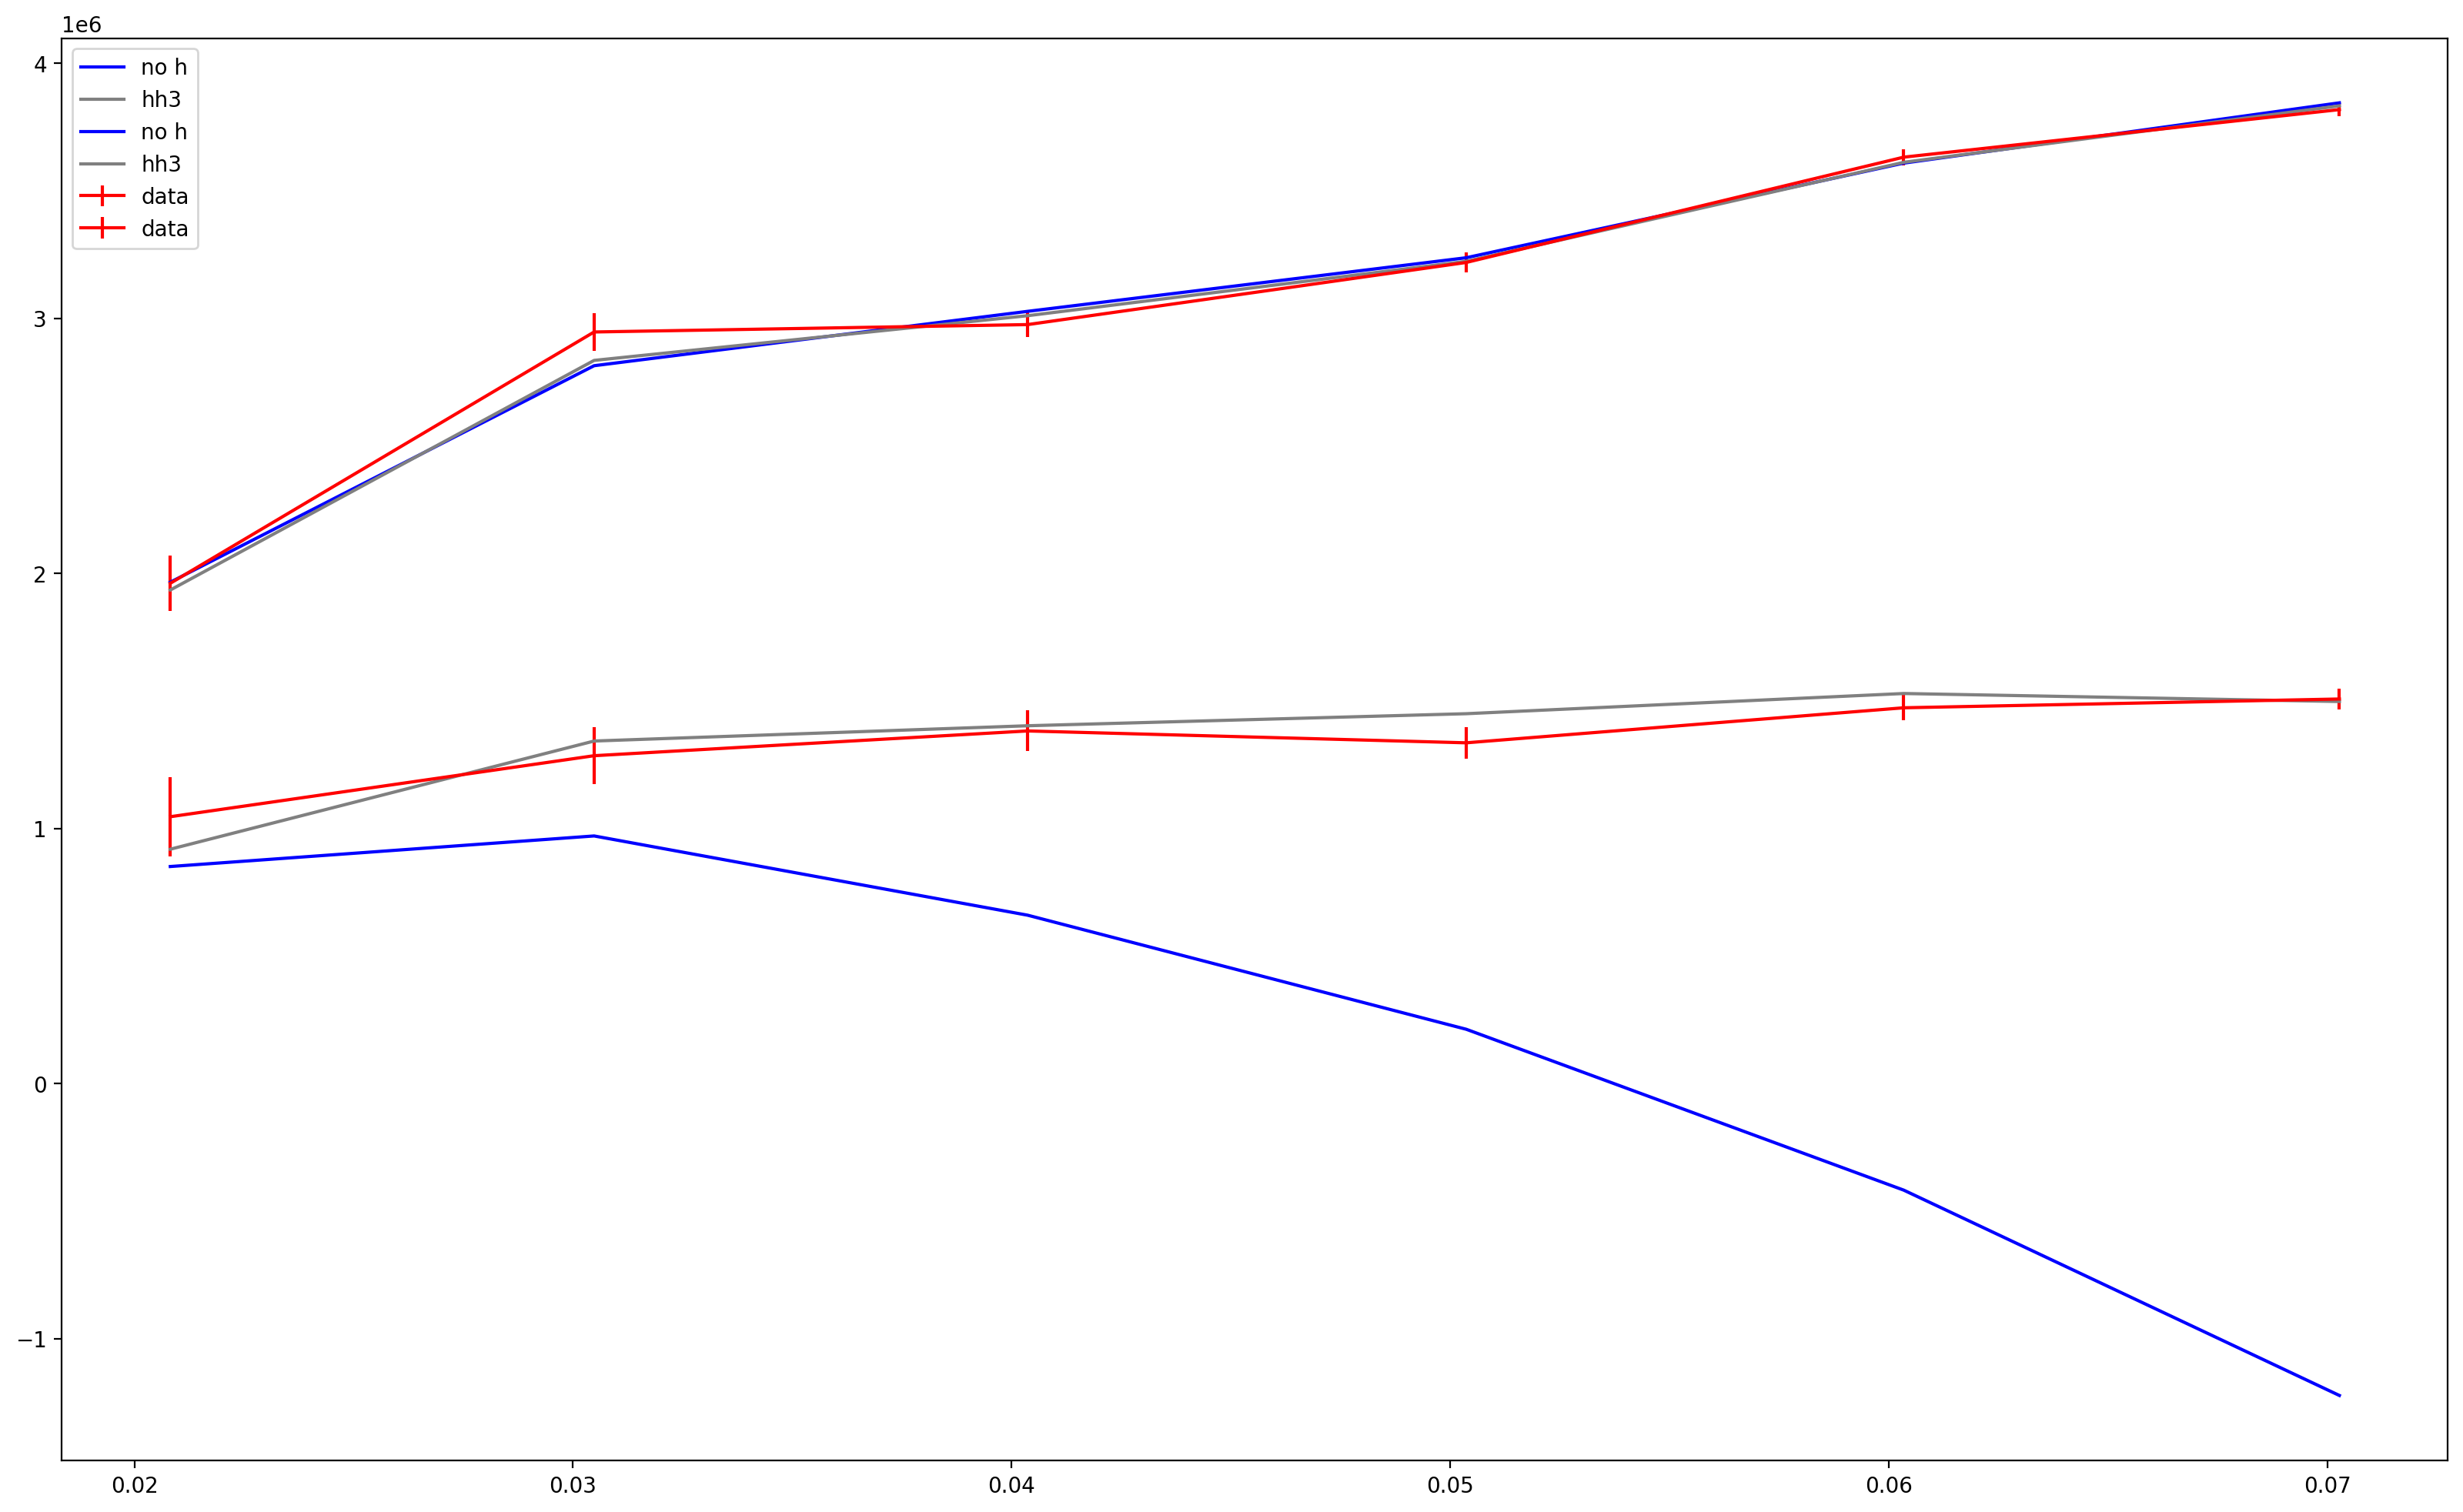

In [43]:
color_map = {'000':'k', '202':'r'}
for i,ell  in enumerate(['000','202']):
    plt.errorbar(bk_data[ell][1:7,0], bk_data[ell][1:7,0]**2*bk_data[ell][1:7,1], bk_data[ell][1:7,0]**2*error[ell]/5, color='r', label='data')
    #plt.plot(k[1:7],k[1:7]**2*bk_model_h[ell][1:7], color='g', label='h')
    plt.plot(k[1:7],k[1:7]**2*bk_model[ell][1:7], color='b', label='no h')
    plt.plot(k[1:7],k[1:7]**2*bk_model_hh3[ell][1:7], color='grey', label='hh3')
    #plt.plot(k[1:7],k[1:7]**2*bk_model_hh3h[ell][1:7], color='k', label='hh3h')
plt.legend()

In [32]:
bk_h_nowiggle['max_a_posteriori']

{'b1': 2.0094602396776966,
 'b2': 0.19910141154452532,
 'bG2': -0.63550988618318,
 'bGamma3': 1.5192378641248823,
 'c0': 16.494194451395096,
 'c2pp': 50.66113367166605,
 'c4pp': -70.152392382617,
 'c1': -32.518200970746136,
 'c2': 72.41269374538112,
 'ch': 364.2566315705354,
 'Pshot': 0.02388111392298975,
 'a0': -1.4098485883649747,
 'Bshot': -3.130541053978172}

In [29]:
bk['max_logposterior']

array([   1.9904121 ,    1.5070363 ,    0.60872453,   -1.6652055 ,
         22.804857  , -225.25562   ,  360.99475   ,  418.82935   ,
          1.7761837 ,   -1.9034727 ,   -4.314234  ], dtype=float32)

In [12]:
cov = np.load('/home/rneveux/covariance_matrix/cov_FirstGenMocks_EZmock_Cubic_LRG_z0.800_pk0_pk2_pk4_bk000_bk202.npy',allow_pickle=True).item()
error = {}
error['000'] = np.sqrt(np.diag(cov['cov'])[121:127])
error['202'] = np.sqrt(np.diag(cov['cov'])[161:167])

In [9]:
cov['length_multi']

[40, 40, 40, 40, 40]

In [34]:
bk_h_nowiggle_h3_h['max_a_posteriori']

{'b1': 1.903470793047228,
 'b2': 3.8058642696689917,
 'bG2': 3.5258324554374627,
 'bGamma3': -9.354674035722429,
 'c0': -6.582583105241927,
 'c2pp': -7.72753747017892,
 'c4pp': -27.131212587709783,
 'c1': -487.15738327438766,
 'c2': 735.3156265396256,
 'ch': 538.7137485691258,
 'Pshot': 4.734521064911041,
 'a0': 11.17038454307808,
 'Bshot': -9.955445028998115}

In [33]:
bk_h_nowiggle_h3['max_a_posteriori']

{'b1': 1.9992707921220019,
 'b2': -1.2455909687716202,
 'bG2': -1.28473091149354,
 'bGamma3': 2.9032400649589105,
 'c0': 12.630181980801297,
 'c2pp': 40.981513541739986,
 'c4pp': -71.76806952215888,
 'c1': -53.043710930092075,
 'c2': 83.8090017698668,
 'ch': 381.04012025941955,
 'Pshot': 0.3742322174755781,
 'a0': -2.1472366397922578,
 'Bshot': -2.8692779101886305}

In [26]:
np.max(bk_h_nowiggle_h3_h['sampler']['loglikelihood'])

-147.33513

In [27]:
np.max(bk_h_nowiggle_h3['sampler']['loglikelihood'])

-19.859617

In [39]:
np.max(bk['sampler']['loglikelihood'])

-16.519756

In [40]:
np.max(bk_h_nowiggle['sampler']['loglikelihood'])

-19.583744